In [36]:
import requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

while "notebooks" in os.getcwd():
    os.chdir("..")
api_key = "64d11b117233d0.77790833"

In [10]:
universe = [
    "AMZN", 
    "AAPL", 
    "MSFT", 
    "TSLA",
    "FB",
    "NFLX",
    "GOOGL",
    "ORCL",
    "ADBE",
    "NVDA"
]

all_news = []
for ticker in universe:
    news = pd.read_pickle(f"data/{ticker}_updated_news.pkl")

    all_news.append(news)

In [18]:
df = pd.concat(all_news)


In [24]:
df["date"] = pd.to_datetime(df["date"], utc=True)

In [56]:
df["date"].dt.hour + df["date"].dt.minute/60 

0       12.416667
1       12.450000
2       12.833333
3       10.300000
4       23.616667
          ...    
4952    15.333333
4953    15.800000
4954    16.383333
4955    16.583333
4956    17.716667
Name: date, Length: 57590, dtype: float64

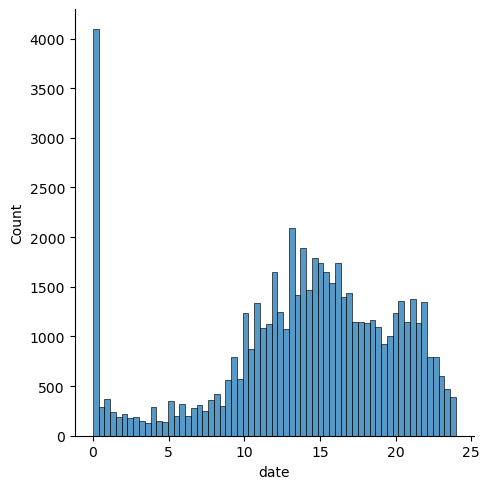

In [58]:
sns.displot(df["date"].dt.hour + df["date"].dt.minute/60)

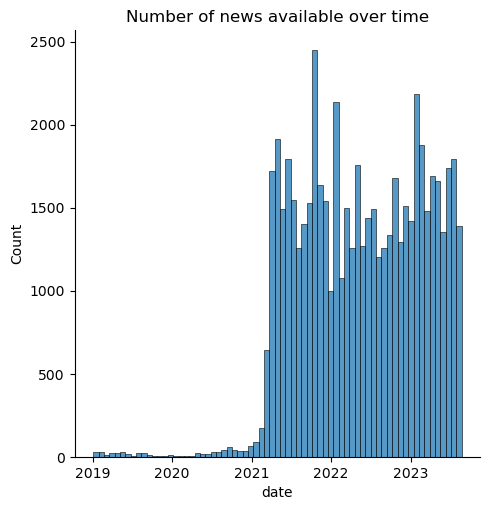

In [59]:
sns.displot(df, x= "date")
plt.title("Number of news available over time")

plt.savefig("img/news_over_time.png", bbox_inches='tight')

In [60]:
url = f'https://eodhistoricaldata.com/api/fundamentals/GSPC.INDX?api_token={api_key}'
news_json = requests.get(url)

In [7]:
news_json

<Response [403]>